<a href="https://colab.research.google.com/github/natsakh/IAD/blob/main/Pr_5/5_2_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

np.random.seed(42)
torch.manual_seed(42)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cpu


Synthetic Data for Linear Regression

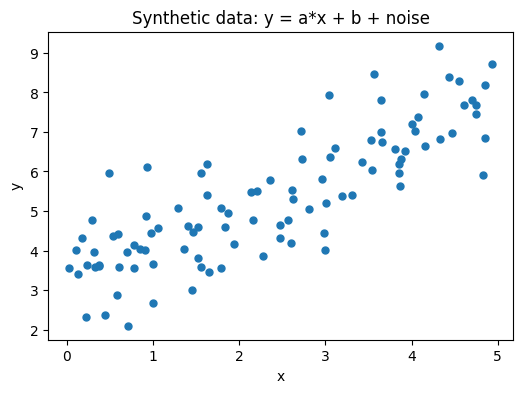

In [2]:
# Synthetic data: y = a*x + b + noise
N = 100
a_true = 1.0
b_true = 3.0

x = np.random.uniform(0, 5, (N, 1)).astype(np.float32)
noise = np.random.normal(0, 1, (N, 1)).astype(np.float32)
y = a_true * x + b_true + noise

# 3) Plot raw data
plt.figure(figsize=(6,4))
plt.scatter(x, y, s=25)
plt.title("Synthetic data: y = a*x + b + noise")
plt.xlabel("x"); plt.ylabel("y")
plt.show()

In [3]:
# Convert to tensors (1D)
X = torch.from_numpy(x)
Y = torch.from_numpy(y)

X = X.to(device)
Y = Y.to(device)

Simple Linear Regression using nn.Module


In [4]:
import torch
import torch.nn as nn

class LinReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(in_features=1, out_features=1)  # y = W x + b
    def forward(self, x):
        return self.lin(x)
model = LinReg().to(device)

In [5]:
print(model)

LinReg(
  (lin): Linear(in_features=1, out_features=1, bias=True)
)


In [6]:
print(model.lin.weight.item(), model.lin.bias.item())

0.7645385265350342 0.8300079107284546


In [7]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

epochs = 20
for epoch in range(epochs):
    epoch_loss = 0.0
    for i in range(N):
        xi = X[i]
        yi = Y[i]
        optimizer.zero_grad()
        pred = model(xi)
        loss = criterion(pred, yi)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    if (epoch+1) % 5 == 0:
        w_t, b_t = model.lin.weight.item(), model.lin.bias.item()
        print(f"[{epoch+1:03d}] mean loss={epoch_loss/N:.4f} | w={w_t:.3f}, b={b_t:.3f}")

w_t, b_t = model.lin.weight.item(), model.lin.bias.item()
print(f"\n Learned params: w={w_t:.3f}, b={b_t:.3f} | True: a={a_true}, b={b_true}")


[005] mean loss=0.9144 | w=0.971, b=3.037
[010] mean loss=0.9024 | w=0.919, b=3.181
[015] mean loss=0.9024 | w=0.916, b=3.191
[020] mean loss=0.9024 | w=0.915, b=3.192

 Learned params: w=0.915, b=3.192 | True: a=1.0, b=3.0


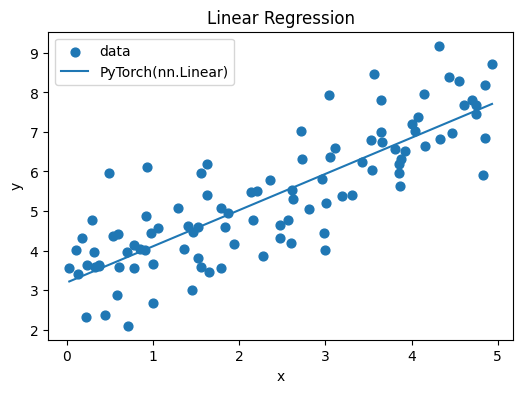

In [8]:
# Візуалізація
with torch.no_grad():
    xx = np.linspace(X.min().item(), X.max().item(), 200).astype(np.float32)
    yy2 = model(torch.from_numpy(xx.reshape(-1,1))).numpy()

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=40, label="data")
plt.plot(xx, yy2.squeeze(), label="PyTorch(nn.Linear)")
plt.title("Linear Regression")
plt.xlabel("x"); plt.ylabel("y")
plt.legend()
plt.show()